# Handwritten digit classification

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Import dataset

In [5]:
X = np.load("data/X.npy")
y = np.load("data/y.npy")

### The dataset contains 5000 examples of handwritten digit images

    * Each training example is a 20x20 (pixels) grayscale image of the digit
    * Each pixel is represented by a floating point number indicating the grayscale intensity at that point.
    * The 20x20 grid of pixels is unrolled into a 400-dimensional vector.
    * Each training example becomes a single row in our data matrix X.
    * This gives us a 5000x400 matrix X where every row is a training example of a handwritten digit image.
    * The second part of the training set is a 5000x1 dimensional vector y that contains labels for the training set.

## Visualizing the data
                
    * We will pick 64 random rows from X, map each row back to 20x20 pixel grayscale image and display the images altogether
    * The true label for each image will be displayed above the image

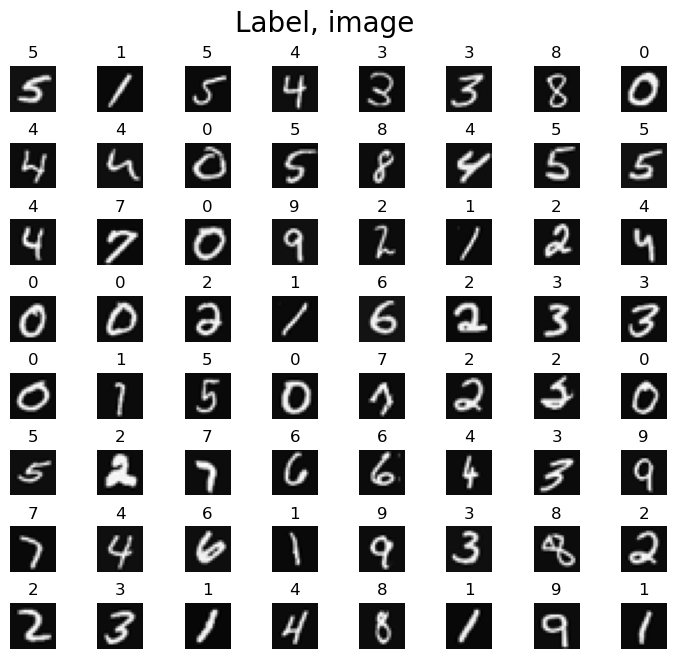

In [6]:
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize = (7, 7))
fig.tight_layout(pad = 0.13, rect = [0, 0.03, 1, 0.91])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    ax.imshow(X_random_reshaped, cmap = "gray")
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize = 20)

## Defining the model

- we will use tensorflow for building the neural network
    - it will have 3 layers (Dense)
        - first layer -> 25 neurons with ReLU activation
        - second layer -> 15 neurons with ReLU activation
        - third layer -> 10 neurons with linear (or no) activation

In [7]:
tf.random.set_seed(1234)

model = Sequential(
    [
        
        tf.keras.Input(shape = (400, )),
        Dense(units = 25, activation = "relu"),
        Dense(units = 15, activation = "relu"),
        Dense(units = 10, activation = "linear")
        
    ], name = "my_model"
)

I0000 00:00:1731619311.488333   52291 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 768 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


In [8]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

## Defining the loss function and opmizer for our model

- we will use use the SparseCategoricalCrossentropy loss function and to indicate that softmax should by included in the loss calculation we will add the from_logits = True to the loss function

- we will use the Adam opmizer for minimizing the cost function.

- then we will just train the model on the given dataset using the fit method of the model which will try to fit the model to the dataset

In [10]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
)

history = model.fit(
    X, y,
    epochs = 40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0336 
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.0286
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.0267
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.0247
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.0228
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.0212
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - loss: 0.0195
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 0.0179
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - loss: 0.0162
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.0151
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.0134
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.0122
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.0111
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.0098
Epoch 15/40
157/157 ━━━━━━━━━━

## Predict

#### Lets compare the predictions vs the labels for a random sample of 64 digits.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

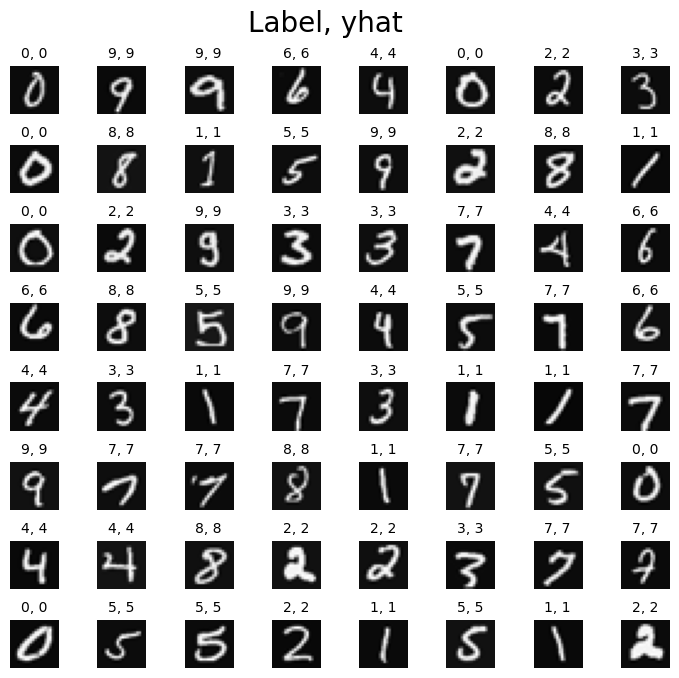

In [30]:
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize = (7, 7))
fig.tight_layout(pad = 0.13, rect = [0, 0.003, 1, 0.91])

for i,ax in enumerate(axes.flat):
    
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    ax.imshow(X_random_reshaped, cmap = "gray")
    
    prediction = model.predict(X[random_index].reshape(1, 400))
    prediction_prob = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_prob)
    
    ax.set_title(f"{y[random_index, 0]}, {yhat}", fontsize = 10)
    ax.set_axis_off()

fig.suptitle("Label, yhat", fontsize = 20)
plt.show()